## Plots help to understand data

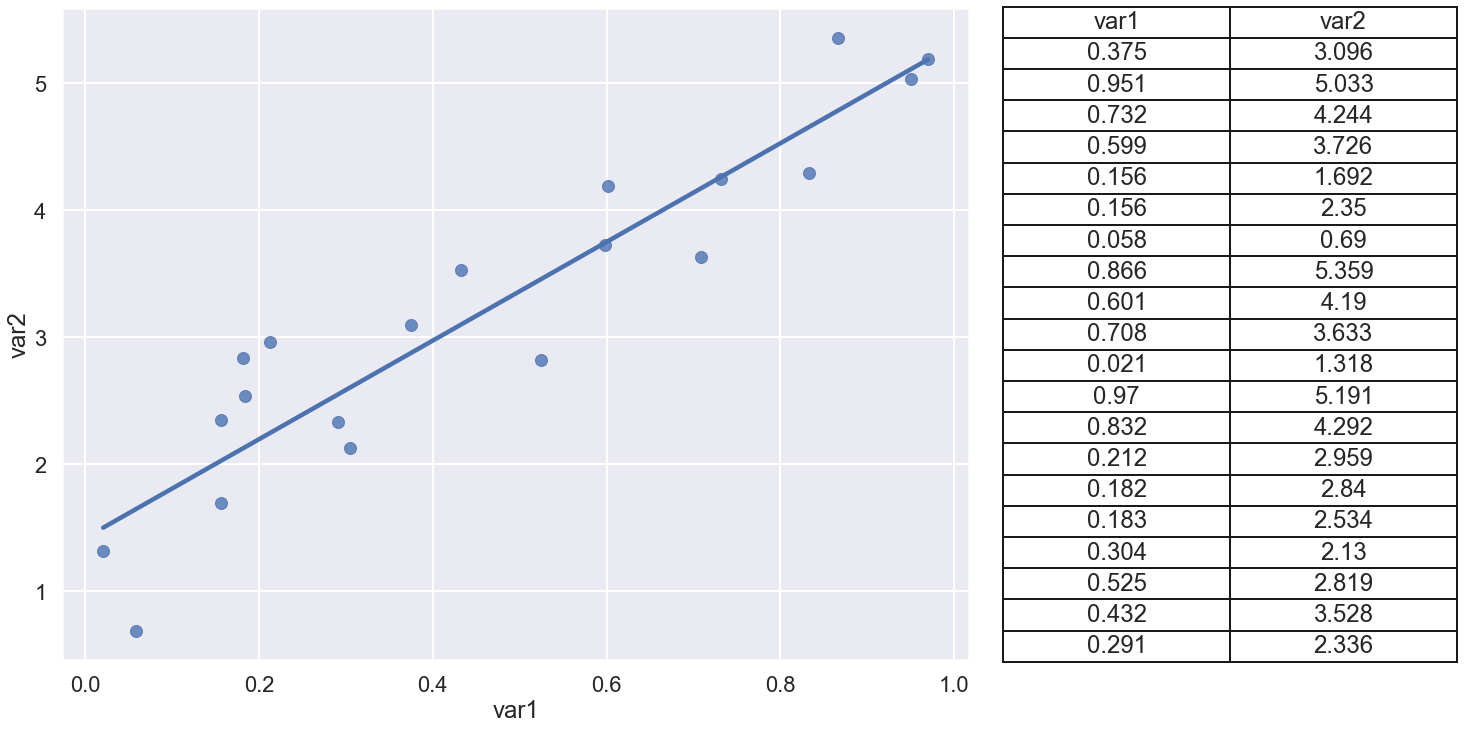

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

np.random.seed(42)
data_size = 20
var1 = np.random.random((data_size, 1))# * 3
df = pd.DataFrame(var1, columns=["var1"])
df["var2"] = var1*5 + np.random.random((data_size, 1)) * 2

sns.set_theme("poster")
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 1]},
    figsize=(25, 12)
)
# scatterplot + regression line
sns.regplot(ax=ax1, data=df, x="var1", y="var2", ci=None)
df = df.round(3)
# table
table = ax2.table(
    colLabels=df.columns,
    cellText=df.values, cellLoc="center",
    loc="center"
)
table.scale(1, 2.6)
ax2.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Find the red dot

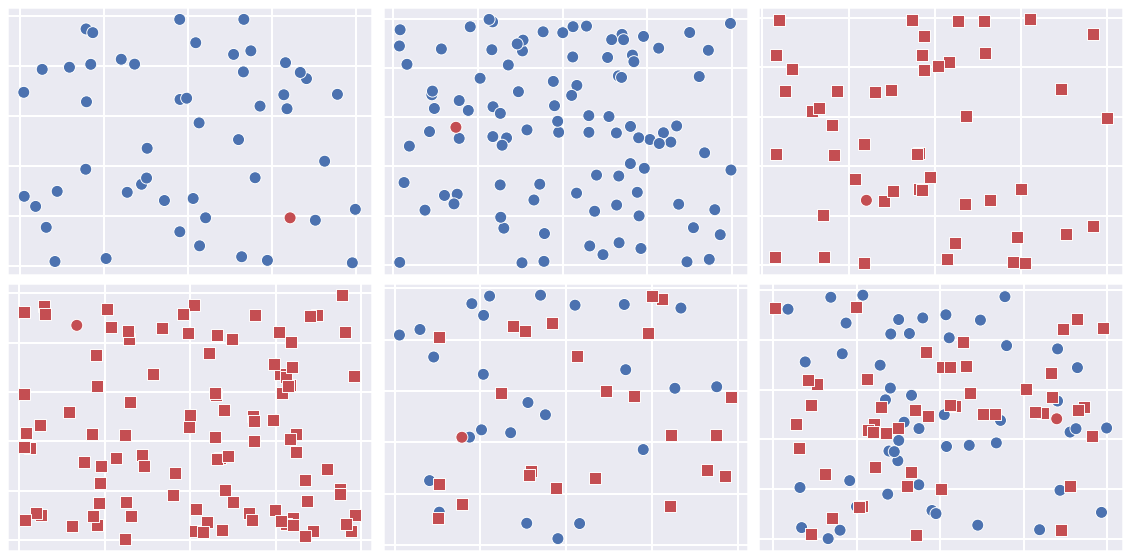

In [ ]:
# Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme("poster")

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    nrows=2, ncols=3, figsize=(20, 10)
)

# create datasets
np.random.seed(18)
data_settings = [
    (50, "b", "o"),
    (100, "b", "o"),
    (50, "r", "s"),
    (100, "r", "s"),
    (50, ("b", "r"), ("o", "s")),
    (100, ("b", "r"), ("o", "s")),
]
data_sizes = [50, 100, 50, 100, 50, 100]
colors = ["b", "b", "r", "r", ("b", "r"), ("b", "r")]
markers = ["o", "o", "s", "s", ("o", "s"), ("o", "s")]
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
#zip(axs, data_sizes, colors, markers):
for ax, (data_size, color, marker) in zip(axs, data_settings):
    # create dataset
    data = np.random.random([data_size, 2])
    df = pd.DataFrame(data, columns=["var1", "var2"])
    df["highlight"] = ["first"] * (data_size//2) + ["second"] * ((data_size//2)-1) + ["red_dot"]
    # add colors to df
    if isinstance(color, str):
        df["colors"] = [color] * (data_size-1) + ["r"]
    else:
        df["colors"] = [color[0]] * (data_size//2) + [color[1]] * ((data_size//2)-1) + ["r"]
    # add markers to df
    if isinstance(marker, str):
        m = {"first": marker, "second": marker, "red_dot": "o"}
        # df["markers"] = [marker] * (data_size-1) + ["o"]
    else:
        m = {"first": marker[0], "second": marker[1], "red_dot": "o"}
        # df["markers"] = [marker[0]] * (data_size//2) + [marker[1]] * ((data_size//2)-1) + ["o"]

    # create plot
    sns.scatterplot(
        data=df, x="var1", y="var2", style="highlight", ax=ax,
        c=df["colors"], markers=m
    )
    ax.set(
        xlabel=None, xticklabels=[],
        ylabel=None, yticklabels=[],
    )
    if ax.get_legend() is not None:
        ax.get_legend().remove()
plt.subplots_adjust(wspace=0.03, hspace=0.03)

# Show graphic
plt.show()

## Scatterplot
- colorblind palette
- groups differentiated by color + shape
- regression line + confidence intervall

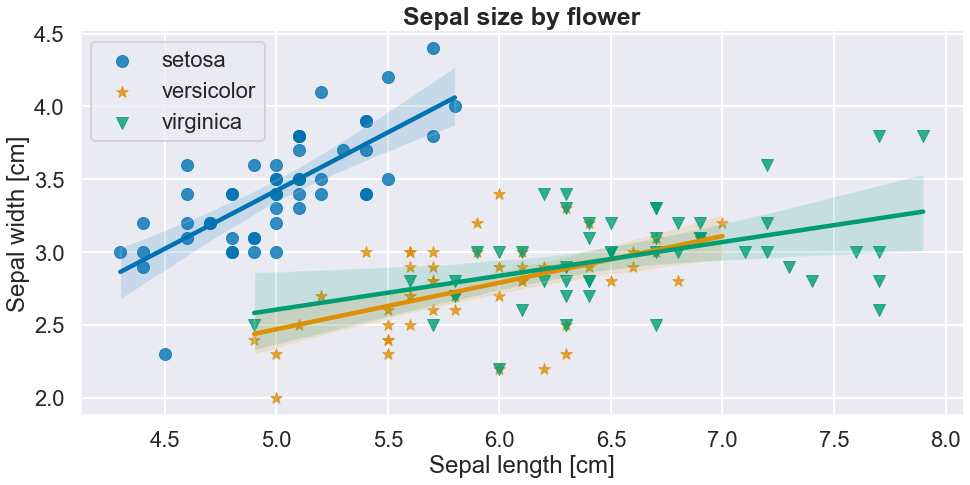

In [ ]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme("poster")
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot(
    x="sepal_length", y="sepal_width", data=df,
    markers=["o", "*", "v"], palette="colorblind",
    fit_reg=True, ci=96, hue='species', legend=False,
    height=7, aspect=2)
 
plt.title("Sepal size by flower", fontdict={"size": 25, "weight": "bold"})
plt.xlabel("Sepal length [cm]")
plt.ylabel("Sepal width [cm]")
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

## Histogram & Density plot

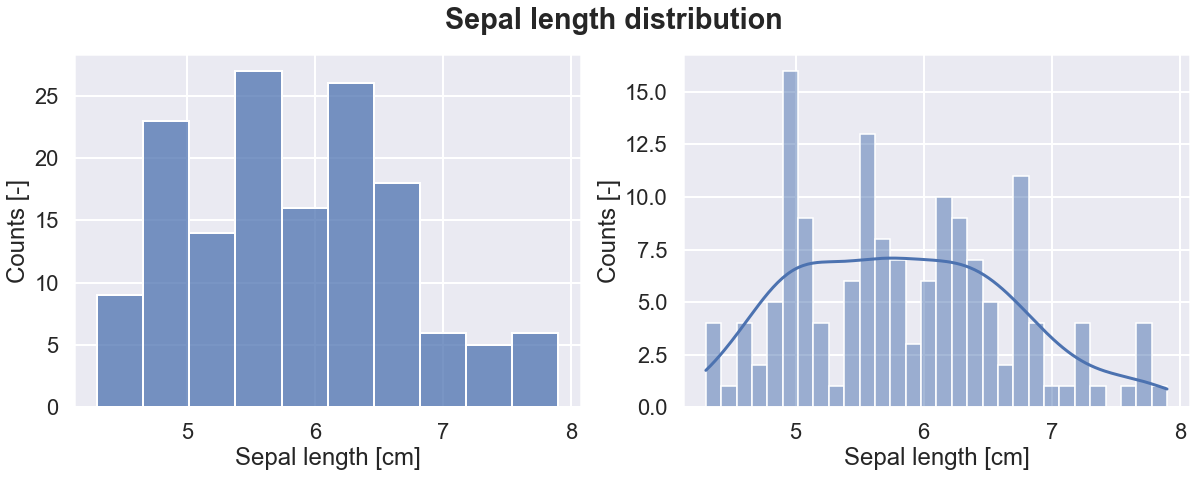

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set("poster", style="darkgrid")
df = sns.load_dataset("iris")

fig, ax = plt.subplots(figsize=(20, 6.5), ncols=2)
sns.histplot(
    data=df, bins=10, x="sepal_length",
    kde=False, ax=ax[0],
    palette="colorblind")
sns.histplot(
    data=df, bins=30, x="sepal_length",
    kde=True, ax=ax[1],
    palette="colorblind")

fig.suptitle("Sepal length distribution", weight="bold")
ax[0].set_xlabel("Sepal length [cm]")
ax[0].set_ylabel("Counts [-]")
ax[1].set_xlabel("Sepal length [cm]")
ax[1].set_ylabel("Counts [-]")

plt.show()

## Box plot & violin plot

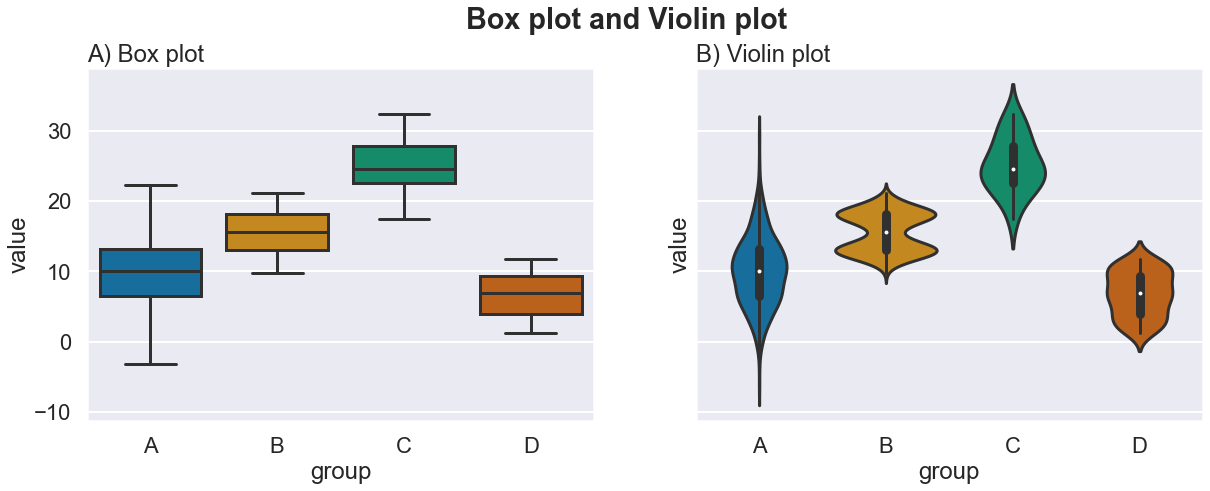

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set("poster", style="darkgrid")
sns.set_palette("colorblind")

# Dataset:
np.random.seed(42)
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a, b, c, d, e])


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6.5), sharey=True)
# boxplot
sns.boxplot(
    x='group', y='value', data=df,
    ax=ax1,
    showfliers=False)
# plot violin chart
sns.violinplot( x='group', y='value', data=df, ax=ax2)

# add title
fig.suptitle("Box plot and Violin plot", weight="bold", y=1.01)
ax1.set_title("A) Box plot", loc="left")
ax2.set_title("B) Violin plot", loc="left")

# show the graph
plt.show()

## Box plot & violin plot with jitter

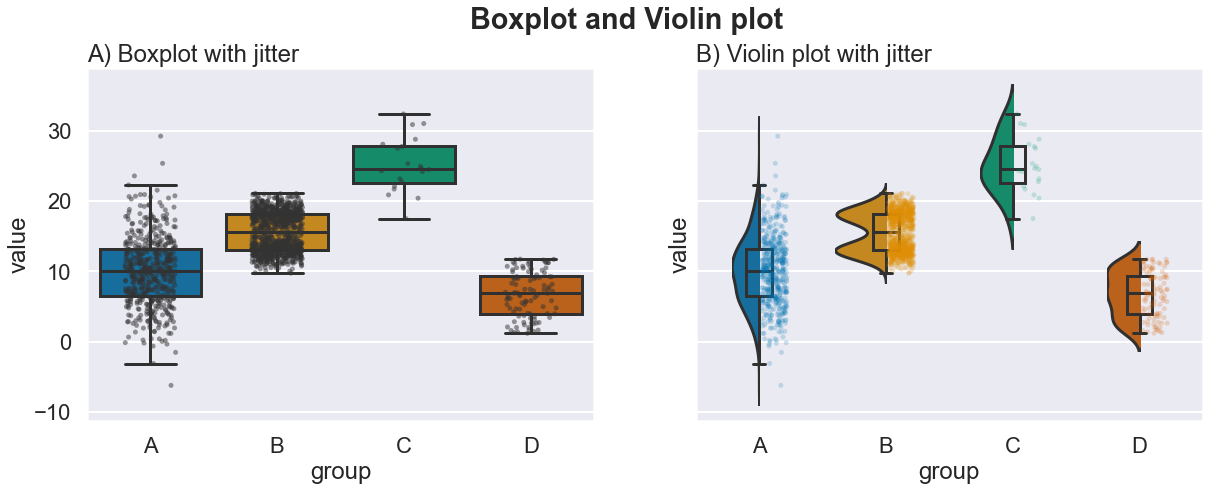

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set("poster", style="darkgrid")
sns.set_palette("colorblind")


# Dataset:
np.random.seed(42)
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a, b, c, d, e])


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6.5), sharey=True)
# boxplot
sns.boxplot(
    x='group', y='value', data=df,
    ax=ax1,
    showfliers=False)
# add stripplot
ax = sns.stripplot(
    x='group', y='value', data=df,
    ax=ax1,
    color=".2", alpha=.5, jitter=0.2#, size=2.5
)
# plot violin chart
sns.violinplot(
    x='group', y='value', data=df, ax=ax2,
    dodge=False, inner=None
)
# remove right violin side
for violin in ax2.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax2.transData))
sns.boxplot(x='group', y='value', data=df, saturation=1, showfliers=False,
            width=0.2, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax2)
old_len_collections = len(ax2.collections)
sns.stripplot(
    x='group', y='value', data=df, ax=ax2,
    hue="group", alpha=.2, dodge=False
)
# move dots to the right
for dots in ax2.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))

# add title
fig.suptitle("Boxplot and Violin plot", weight="bold", y=1.01)
ax1.set_title("A) Boxplot with jitter", loc="left")
ax2.set_title("B) Violin plot with jitter", loc="left")

ax2.legend_.remove()
# show the graph
plt.show()

## Heatmap

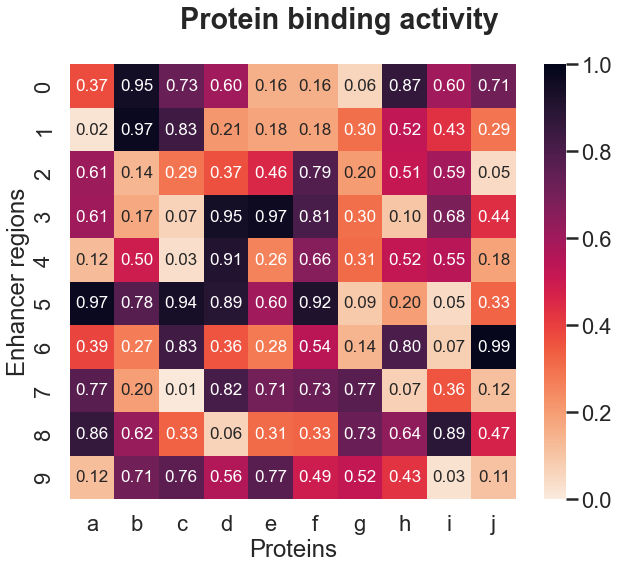

In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np

sns.set("poster")

# Create a dataset
np.random.seed(42)
data_size = 10
df = pd.DataFrame(
    np.random.random((data_size, data_size)),
    columns=[chr(97+idx) for idx in range(data_size)]
)

fig, ax = plt.subplots(figsize=(10, 8))
# Create heatmap
sns.heatmap(
    df, ax=ax, cmap="rocket_r", vmin=0, vmax=1,
    annot=True, fmt=".2f", annot_kws={"fontsize":17}
)

fig.suptitle("Protein binding activity", weight="bold", y=0.98, x=0.5)
ax.set_xlabel("Proteins")
ax.set_ylabel("Enhancer regions")

plt.show()

## Heatmap optical illusion

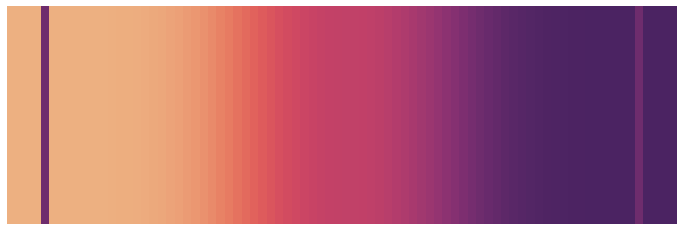

In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import math

sns.set("poster")

# Create a dataset
data_size = 80
half_data_size = data_size//2
arr = np.empty([1, data_size])
for idx in range(-half_data_size, half_data_size):
    arr[:, idx+half_data_size] = 1/(1+math.e**(-idx/(3*50/abs(idx+.1))))
num = 4
arr[:, [num, -num-1]] = 0.85
df = pd.DataFrame(arr)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(
    df, ax=ax, cmap="flare", vmin=0, vmax=1, cbar=False,
    xticklabels=False, yticklabels=False
)

plt.show()

## Lollipop

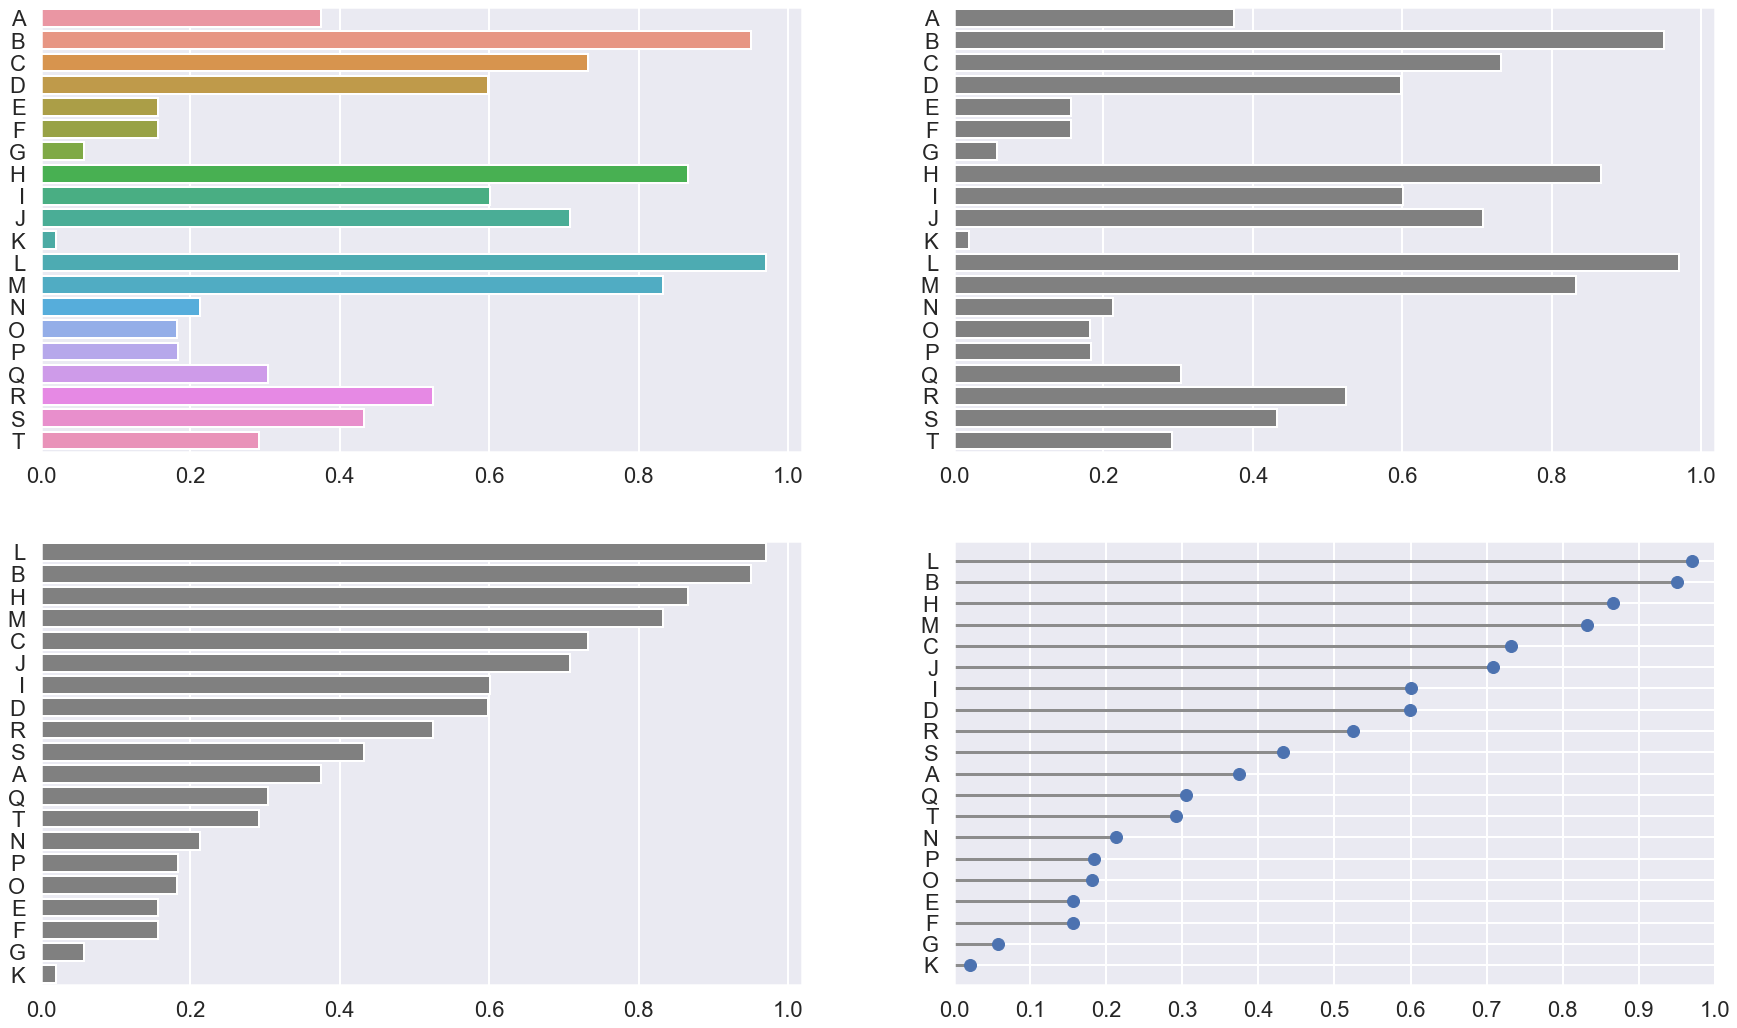

In [ ]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe
np.random.seed(42)
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

# Reorder it based on the values
orderedA_df = df.sort_values(by='values', ascending=False)
orderedB_df = df.sort_values(by='values', ascending=True)
# my_range=range(1,len(df.index)+1)

# plot lollipop
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(30, 18))
sns.barplot(x="values", y="group", data=df, ax=ax1)
ax1.set(xlabel=None, ylabel=None)
sns.barplot(x="values", y="group", data=df, ax=ax2, color=".5")
ax2.set(xlabel=None, ylabel=None)
sns.barplot(x="values", y="group", data=orderedA_df, ax=ax3, color=".5")
ax3.set(xlabel=None, ylabel=None)
ax4.stem(
    orderedB_df["group"], orderedB_df["values"],
    orientation="horizontal", use_line_collection=False,
    linefmt="C7-", markerfmt="C0o", basefmt=" "
)
ax4.set(xlim=(0, 1), xticks=np.arange(0, 1.01, .1))
# # Add titles and axis names
# plt.title("A horizontal lolipop plot")#, loc='left')
# plt.xlabel('Value of the variable')
# plt.ylabel('Group')

# Show the plot
plt.show()